In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
ds = pd.read_csv('movies_prerelease.csv')

In [3]:
ds

,Movie,Target,Budget,BoxOffice,Rating,Votes,Year,"rat_(0, 2]","rat_(2, 4]","rat_(4, 6]",...,s_Zakir Hussain,s_Zareen Khan,s_Zarina Wahab,s_Zayed Khan,s_Zeenat Aman,s_Zenia Starr,s_Zenobia Shroff,s_Zohra Sehgal,s_Zoya Afroz,s_Zoya Hussain
0,Batti Gul Meter Chalu,2,50.0,37.00,6.3,1552,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dangal,6,90.0,370.00,8.5,105480,2016,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manmarziyaan,3,30.0,26.00,7.0,1836,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sui Dhaaga: Made in India,5,50.0,79.00,6.9,1342,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Stree,6,25.0,127.00,8.3,7801,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Manto,2,8.0,3.50,7.9,622,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Pataakha,2,20.0,6.50,7.7,392,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3 Idiots,6,55.0,202.00,8.4,282358,2009,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,PK,6,85.0,340.00,8.2,127703,2014,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Padman,5,40.0,81.00,8.1,10917,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = ds.drop(columns=['Movie', 'BoxOffice', 'Rating', 'Votes', 'Year', 'rat_(0, 2]', 'rat_(2, 4]', 'rat_(4, 6]',  'rat_(6, 8]', 'rat_(8, 10]']).values
#data = ds.drop(columns=['Movie', 'BoxOffice', 'Rating', 'Votes', 'Year']).values

In [5]:
data.shape

(986, 1797)

In [6]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
## 70-30 Split randomized
split = int(0.7*data.shape[0])
np.random.shuffle(data)
X_train = data[:split, 1:]
Y_train = data[:split, 0]

X_test = data[split:, 1:]
Y_test = data[split:, 0]

print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(690, 1796) (690,)
(296, 1796) (296,)


0.2972972972972973


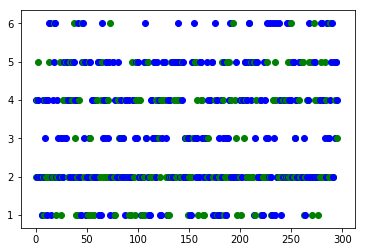

Normalized confusion matrix
[[0.36666667 0.43333333 0.         0.1        0.06666667 0.03333333]
 [0.17977528 0.4494382  0.02247191 0.20224719 0.13483146 0.01123596]
 [0.13636364 0.31818182 0.18181818 0.22727273 0.13636364 0.        ]
 [0.11320755 0.45283019 0.09433962 0.22641509 0.0754717  0.03773585]
 [0.01785714 0.35714286 0.05357143 0.23214286 0.26785714 0.07142857]
 [0.08333333 0.33333333 0.04166667 0.16666667 0.29166667 0.08333333]]


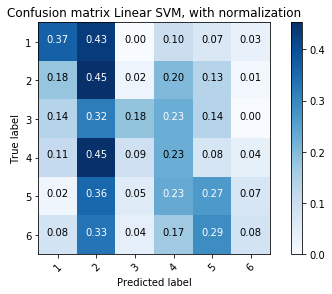

In [14]:
from sklearn.externals import joblib
svm_model_linear = svm.SVC(kernel = 'linear', C = 1).fit(X_train, Y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, Y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(Y_test, svm_predictions)

for ix in range(svm_predictions.shape[0]):
    plt.scatter(ix, svm_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Linear SVM, with normalization')

pickle.dump(svm_model_linear, open('full_svm.pkl', 'wb'))

In [19]:
loaded_model = pickle.load(open('full_svm.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)
for x in range(result.shape[0]):
    print(result[x], Y_test[x])

2.0 4.0
4.0 2.0
5.0 4.0
2.0 2.0
2.0 2.0
2.0 2.0
1.0 1.0
2.0 4.0
1.0 2.0
4.0 3.0
2.0 4.0
2.0 1.0
2.0 4.0
5.0 6.0
2.0 6.0
2.0 1.0
2.0 2.0
2.0 4.0
6.0 5.0
2.0 6.0
1.0 2.0
2.0 4.0
2.0 3.0
2.0 2.0
5.0 2.0
1.0 3.0
2.0 3.0
4.0 2.0
5.0 5.0
4.0 3.0
5.0 3.0
4.0 5.0
2.0 4.0
5.0 2.0
4.0 4.0
4.0 5.0
5.0 2.0
6.0 5.0
3.0 4.0
1.0 2.0
2.0 4.0
1.0 6.0
4.0 2.0
2.0 2.0
1.0 1.0
6.0 5.0
5.0 6.0
2.0 3.0
5.0 5.0
1.0 1.0
2.0 2.0
1.0 2.0
5.0 3.0
3.0 5.0
1.0 2.0
2.0 4.0
2.0 4.0
1.0 2.0
2.0 2.0
4.0 4.0
4.0 2.0
5.0 5.0
1.0 1.0
2.0 5.0
4.0 1.0
5.0 6.0
2.0 3.0
4.0 4.0
2.0 3.0
5.0 5.0
2.0 4.0
4.0 3.0
2.0 5.0
6.0 1.0
2.0 2.0
2.0 2.0
5.0 5.0
2.0 1.0
1.0 4.0
2.0 2.0
4.0 5.0
3.0 2.0
3.0 3.0
2.0 4.0
2.0 2.0
3.0 3.0
2.0 2.0
4.0 1.0
4.0 4.0
2.0 2.0
2.0 2.0
1.0 4.0
2.0 2.0
1.0 2.0
5.0 2.0
4.0 4.0
2.0 4.0
1.0 3.0
4.0 5.0
5.0 3.0
2.0 5.0
4.0 2.0
4.0 2.0
2.0 1.0
1.0 2.0
1.0 2.0
2.0 5.0
1.0 6.0
3.0 3.0
5.0 5.0
5.0 2.0
1.0 1.0
2.0 1.0
2.0 4.0
2.0 4.0
3.0 3.0
5.0 5.0
2.0 3.0
4.0 2.0
4.0 5.0
4.0 3.0
3.0 4.0
2.0 1.0
4.0 1.0
4.0 3.0


0.22297297297297297


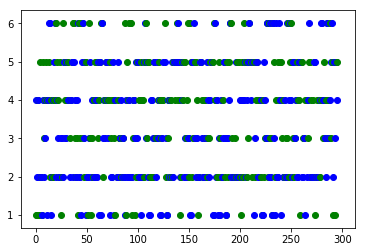

Normalized confusion matrix
[[0.16666667 0.1        0.1        0.2        0.26666667 0.16666667]
 [0.08988764 0.20224719 0.15730337 0.24719101 0.20224719 0.1011236 ]
 [0.06818182 0.22727273 0.20454545 0.27272727 0.15909091 0.06818182]
 [0.0754717  0.28301887 0.18867925 0.1509434  0.22641509 0.0754717 ]
 [0.03571429 0.19642857 0.14285714 0.19642857 0.35714286 0.07142857]
 [0.04166667 0.04166667 0.16666667 0.29166667 0.20833333 0.25      ]]


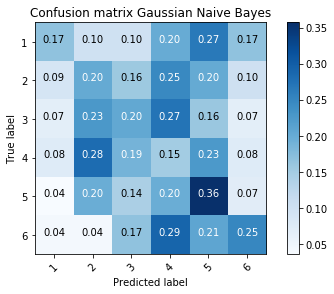

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy for X_test
accuracy = gnb.score(X_test, Y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(Y_test, gnb_predictions)

for ix in range(gnb_predictions.shape[0]):
    plt.scatter(ix, gnb_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Gaussian Naive Bayes')

pickle.dump(gnb, open('full_nb.pkl', 'wb'))

0.23310810810810811


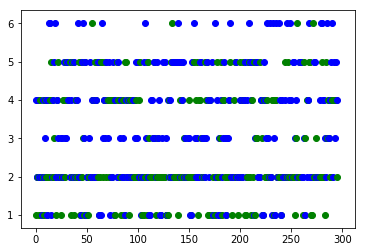

Normalized confusion matrix
[[0.36666667 0.2        0.13333333 0.13333333 0.16666667 0.        ]
 [0.19101124 0.41573034 0.02247191 0.17977528 0.16853933 0.02247191]
 [0.15909091 0.47727273 0.06818182 0.18181818 0.11363636 0.        ]
 [0.1509434  0.43396226 0.01886792 0.26415094 0.11320755 0.01886792]
 [0.08928571 0.55357143 0.07142857 0.19642857 0.07142857 0.01785714]
 [0.08333333 0.375      0.08333333 0.20833333 0.25       0.        ]]


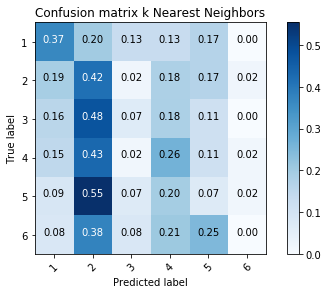

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(Y_test, knn_predictions)

for ix in range(knn_predictions.shape[0]):
    plt.scatter(ix, knn_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix k Nearest Neighbors')

pickle.dump(knn, open('full_knn.pkl', 'wb'))

0.27364864864864863


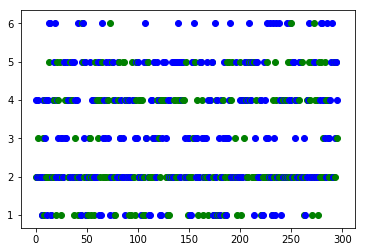

Normalized confusion matrix
[[0.33333333 0.43333333 0.         0.13333333 0.06666667 0.03333333]
 [0.14606742 0.50561798 0.01123596 0.17977528 0.15730337 0.        ]
 [0.11363636 0.43181818 0.06818182 0.27272727 0.11363636 0.        ]
 [0.13207547 0.41509434 0.13207547 0.22641509 0.0754717  0.01886792]
 [0.03571429 0.35714286 0.05357143 0.32142857 0.19642857 0.03571429]
 [0.08333333 0.375      0.04166667 0.16666667 0.33333333 0.        ]]


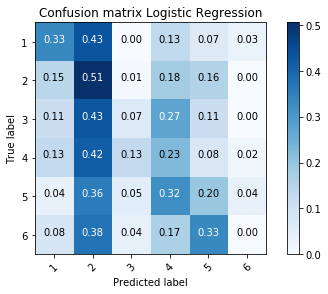

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = lr.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
lr_predictions = lr.predict(X_test) 
cm = confusion_matrix(Y_test, lr_predictions)

for ix in range(lr_predictions.shape[0]):
    plt.scatter(ix, lr_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Logistic Regression')

pickle.dump(lr, open('full_logreg.pkl', 'wb'))

0.31756756756756754


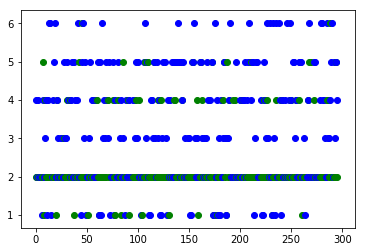

Normalized confusion matrix
[[0.13333333 0.83333333 0.         0.03333333 0.         0.        ]
 [0.07865169 0.82022472 0.         0.06741573 0.03370787 0.        ]
 [0.         0.79545455 0.         0.15909091 0.04545455 0.        ]
 [0.0754717  0.67924528 0.         0.18867925 0.03773585 0.01886792]
 [0.01785714 0.66071429 0.01785714 0.16071429 0.125      0.01785714]
 [0.         0.79166667 0.         0.125      0.08333333 0.        ]]


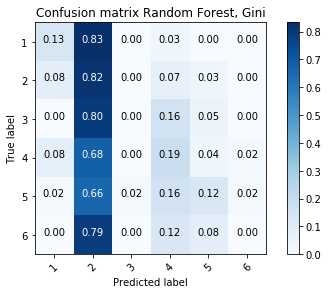

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Random Forest, Gini')

pickle.dump(rf, open('full_randfor.pkl', 'wb'))

0.2972972972972973


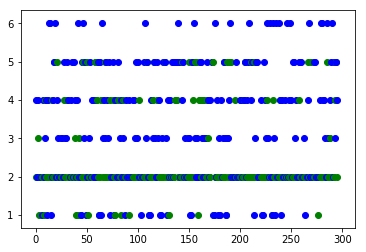

Normalized confusion matrix
[[0.2        0.66666667 0.         0.06666667 0.06666667 0.        ]
 [0.07865169 0.80898876 0.01123596 0.05617978 0.04494382 0.        ]
 [0.         0.70454545 0.         0.18181818 0.11363636 0.        ]
 [0.05660377 0.71698113 0.0754717  0.03773585 0.11320755 0.        ]
 [0.         0.64285714 0.         0.21428571 0.14285714 0.        ]
 [0.04166667 0.75       0.         0.125      0.08333333 0.        ]]


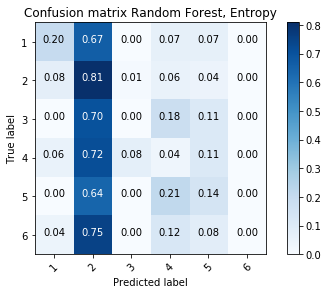

In [24]:
rf = RandomForestClassifier(n_estimators=20, criterion='entropy', warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Random Forest, Entropy')

pickle.dump(rf, open('full_randfor2.pkl', 'wb'))